In [53]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.datasets import load_digits

In [54]:
df=pd.read_csv("Week7_train.csv")

In [55]:
df

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
41995,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41996,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41997,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
41998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [56]:
df.iloc[0,:]

label       1
pixel0      0
pixel1      0
pixel2      0
pixel3      0
           ..
pixel779    0
pixel780    0
pixel781    0
pixel782    0
pixel783    0
Name: 0, Length: 785, dtype: int64

In [57]:
df.iloc[0,0]

1

In [58]:
df.iloc[0,1:].values.reshape(28,28)

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0, 188, 255,  94,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0, 191, 250, 253,  93,   0,   0,   0,
          0,   0],
       [  

1


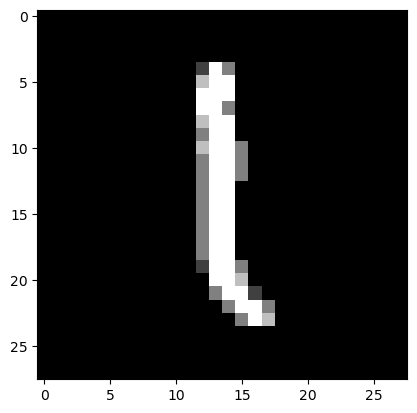

In [59]:
plt.imshow(df.iloc[400,1:].values.reshape(28,28), cmap='gray')
print(df.iloc[400,0])

In [60]:
df.sample(frac=0.001)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
9271,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29681,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7500,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
25559,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
8483,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
12179,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
6689,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1766,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
19502,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
29866,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [61]:
#checkiing the shape of data
df.shape

(42000, 785)

In [62]:
#select 10%of data
df_sample=df.sample(frac=0.1)


In [63]:
#Print the shape of the selected dataset
print("Shape of selected dataset:", df_sample.shape)

Shape of selected dataset: (4200, 785)


In [64]:
#look at the top 5 rows
df_sample.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
28374,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16313,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
21474,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
23637,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
11792,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [65]:
#find the no of unique class label
num_unique_labels = df_sample['label'].unique()

print("Number of unique class labels:", num_unique_labels)


Number of unique class labels: [2 4 9 3 7 0 8 1 6 5]


In [66]:

#print the no of examples of each class label
class_counts = df_sample['label'].value_counts()
print("Number of examples for each class label:\n", class_counts)


Number of examples for each class label:
 label
1    465
7    460
2    441
9    440
6    430
3    402
4    397
8    396
5    393
0    376
Name: count, dtype: int64


In [67]:
#prepare x and y
X = df_sample.drop(columns=['label'])
Y = df_sample['label']
print("Shape of X (features):", X.shape)
print("Shape of Y (labels):", Y.shape)


Shape of X (features): (4200, 784)
Shape of Y (labels): (4200,)


In [68]:
#2nd way of read data 
x=df_sample.iloc[:,1:]
y=df_sample.iloc[:,0]

In [69]:
x.shape

(4200, 784)

In [70]:
y.shape

(4200,)

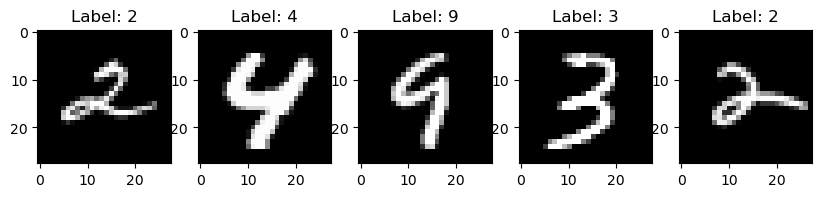

In [71]:
#visualization of the image of the first 5 digital in X-also print the class label in
plt.figure(figsize=(10, 5))

for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')
    plt.title(f"Label: {Y.iloc[i]}")

plt.show()


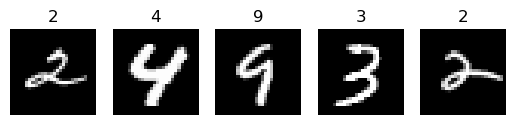

In [72]:
for i in range(5):  
    plt.subplot(1, 5, i + 1)  
    plt.imshow(X.iloc[i].values.reshape(28, 28), cmap='gray')  
    plt.title(Y.iloc[i])  
    plt.axis('off')  

plt.show()


In [73]:
#spllit the train dataset into training set 75% and validation set 25%
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.25,random_state=42)


In [74]:
#fit knn classifies to training data

# Initialize KNN with k=5 (default)
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, Y_train)


KNeighborsClassifier()

In [75]:
#default parameters n-neighbors-5,metric='minkowski' p=2
KNeighborsClassifier(n_neighbors=5, metric='minkowski', p=2)


KNeighborsClassifier()

In [76]:
#predict the validation set of results
y_pred=knn.predict(X_test)
print("Predicted labels",y_pred)

Predicted labels [4 0 2 ... 7 3 9]


In [77]:
#print the confusion matrix

In [78]:
cm=confusion_matrix(Y_test,y_pred)
print("confusion matrix is ",cm)

confusion matrix is  [[ 89   0   0   0   0   0   0   0   0   0]
 [  0 115   0   0   0   0   1   0   0   0]
 [  0   4  89   1   0   0   0   7   0   2]
 [  1   5   4  80   0   0   2   0   0   3]
 [  0   3   0   0  97   0   0   0   0   8]
 [  1   0   0  10   0  86   3   0   0   1]
 [  1   2   0   0   0   2  94   0   0   0]
 [  0   4   0   1   0   0   0 120   0   4]
 [  2   4   0   2   0   3   0   2  82   2]
 [  1   1   1   0   5   0   0   1   1 103]]


In [79]:
#printing classification report and accuracy
from sklearn.metrics import classification_report, accuracy_score

print("Classification Report:\n", classification_report(Y_test, y_pred))

# Print accuracy score
accuracy = accuracy_score(Y_test, y_pred)
print("Accuracy:", accuracy)


Classification Report:
               precision    recall  f1-score   support

           0       0.94      1.00      0.97        89
           1       0.83      0.99      0.91       116
           2       0.95      0.86      0.90       103
           3       0.85      0.84      0.85        95
           4       0.95      0.90      0.92       108
           5       0.95      0.85      0.90       101
           6       0.94      0.95      0.94        99
           7       0.92      0.93      0.93       129
           8       0.99      0.85      0.91        97
           9       0.84      0.91      0.87       113

    accuracy                           0.91      1050
   macro avg       0.92      0.91      0.91      1050
weighted avg       0.91      0.91      0.91      1050

Accuracy: 0.9095238095238095


In [90]:
X_test

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

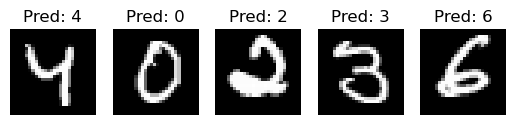

In [97]:
#visualize the image of the first 5 digits in x-test also print the predicted
for i in range(5):
    plt.subplot(1, 5, i + 1)
    plt.imshow(X_test[i,:].reshape(28, 28), cmap='gray')
    plt.title(f"Pred: {y_pred[i]}")
    plt.axis('OFF')
plt.show()
